## Introduction

&copy; [www.learnopencv.com](https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)

In this article, we will learn how to implement a Feedforward Neural Network in Keras. We will use handwritten digit classification as an example to illustrate the effectiveness of a feedforward network. We will also see how to spot and overcome Overfitting during training.

**MNIST** is a commonly used handwritten digit dataset consisting of 60,000 images in the training set and 10,000 images in the test set. So, each digit has 6000 images in the training set. The digits are size-normalized and centered in a fixed-size ( 28×28 ) image. The task is to train a machine learning algorithm to recognize a new sample from the test set correctly.

Example of embeding video:

<iframe width="560" height="315" src="https://www.youtube.com/embed/cAICT4Al5Ow?rel=0" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

## 1. The Network

We will use raw pixel values as input to the network. The images are matrices of size 28×28. So, we reshape the image matrix to an array of size 784 ( 28*28 ) and feed this array to the network. We will use a network with 2 hidden layers having 512 neurons each. The output layer will have 10 layers for the 10 digits. A schematic diagram is shown below.
<img src="https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-mnist-schematic.jpg" alt="MPL MNIST Schematic" style="width: 768px;"/>

## 2. Load the Data

Keras comes with the MNIST data loader. It has a function mnist.load_data() which downloads the data from its servers if it is not present on your computer. The data loaded using this function is divided into training and test sets. This is done by the following:

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


## 3. Checkout the Data

Let’s see how the data looks like. The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28×28 grayscale image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

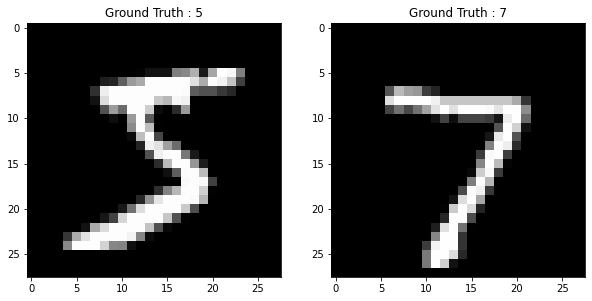

In [3]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

## 4. Process the data

The images are grayscale and the pixel values range from 0 to 255. We will apply the following preprocessing to the data before feeding it to the network.

* Convert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [4]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

* Convert the data to float and scale the values between 0 to 1.

In [5]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

* Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.

For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [6]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 5. Keras Workflow for training the network

The block diagram is given here for reference. Basically, once you have the training and test data, you can follow these steps to train a neural network in Keras.
<img src="https://www.learnopencv.com/wp-content/uploads/2017/09/keras-workflow.jpg" alt="Keras workflow" style="width: 768px;"/>

### 5.1. Create the Network

We had mentioned that we will be using a network with 2 hidden layers and an output layer with 10 units. The number of units in the hidden layers is kept to be 512. The input to the network is the 784-dimensional array converted from the 28×28 image.

We will use the Sequential model for building the network. In the Sequential model, we can just stack up layers by adding the desired layer one by one. We use the Dense layer, also called fully connected layer since we are building a feedforward network in which all the neurons from one layer are connected to the neurons in the previous layer. Apart from the Dense layer, we add the ReLU activation function which is required to introduce non-linearity to the model. This will help the network learn non-linear decision boundaries. The last layer is a softmax layer as it is a multiclass classification problem. For binary classification, we can use sigmoid.

In [7]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

### 5.2. Configure the Network

In this step, we configure the optimizer to be rmsprop. We also specify the loss type which is categorical cross entropy which is used for multiclass classification. We also specify the metrics ( accuracy in this case ) which we want to track during the training process. You can also try using any other optimizer such as adam or SGD.

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 5.3. Train the Model

The network is ready to get trained. This is done using the fit() function in Keras. We specify the number of epochs as 20. This means that the whole dataset will be fed to the network 20 times. We will be using the test data for validation.

In [9]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2739 - accuracy: 0.9159 - val_loss: 0.1133 - val_accuracy: 0.9633
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0936 - accuracy: 0.9718 - val_loss: 0.1235 - val_accuracy: 0.9607
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0916 - val_accuracy: 0.9721
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0407 - accuracy: 0.9865 - val_loss: 0.0753 - val_accuracy: 0.9789
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0671 - val_accuracy: 0.9823
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0785 - val_accuracy: 0.9781
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0850 - val_accuracy: 0.9785
Epoch 

### 5.4. Evaluate the trained model

We check the performance on the whole test data using the evaluate() method.

In [10]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 685us/step - loss: 0.1238 - accuracy: 0.9826
Evaluation result on Test Data : Loss = 0.12383079528808594, accuracy = 0.9825999736785889


The results look good. However, we would want to have another look at the results.

### 6. Check for Overfitting

The fit() function returns a history object which has a dictionary of all the metrics which were required to be tracked during training. We can use the data in the history object to plot the loss and accuracy curves to check how the training process went.
You can use the history.history.keys() function to check what metrics are present in the history. It should look like the following

['acc', 'loss', 'val_acc', 'val_loss']

Let us plot the loss and accuracy curves.

KeyError: 'acc'

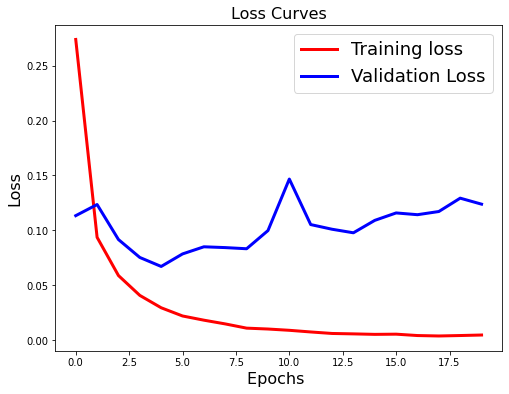

<Figure size 576x432 with 0 Axes>

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Although the accuracy obtained above is very good, if you see the loss and accuracy curves in the above figures, you’ll notice that the validation loss initially decrease, but then it starts increasing gradually. Also, there is a substantial difference between the training and test accuracy. This is a clear sign of Overfitting which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data. Thus, the difference in the training and test accuracy.

## 7. Add Regularization to the model

Overfitting occurs mainly because the network parameters are getting too biased towards the training data. We can add a dropout layer to overcome this problem to a certain extent. In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.

In [12]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

## 8. Check performance after regularization

We will train the network again in the same way we did earlier and check the loss and accuracy curves.

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.3707 - accuracy: 0.8858 - val_loss: 0.1475 - val_accuracy: 0.9543
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1690 - accuracy: 0.9487 - val_loss: 0.1000 - val_accuracy: 0.9690
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1321 - accuracy: 0.9612 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1114 - accuracy: 0.9671 - val_loss: 0.0864 - val_accuracy: 0.9752
Epoch 5/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0966 - accuracy: 0.9718 - val_loss: 0.0796 - val_accuracy: 0.9780
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0868 - accuracy: 0.9739 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0812 - accuracy: 0.9758 - val_loss: 0.0756 - val_accuracy: 0.9803
Epoch 

KeyError: 'acc'

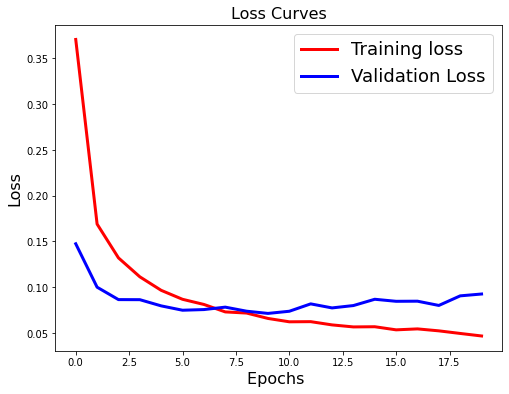

<Figure size 576x432 with 0 Axes>

In [13]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From the above loss and accuracy curves, we can observe that

* The validation loss is not increasing
* The difference between the train and validation accuracy is not very high

Thus, we can say that the model has better generalization capability as the performance does not decrease drastically in case of unseen data also.

## 9. Inference on a single image

We have seen that the first image in the test set is the number 7. Let us see what the model predicts.

### 9.1. Getting the predicted class

During the inference stage, it might be sufficient to know the class of the input data. It can be done as follows.

In [24]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

array([7])

### 9.2. Getting the probabilities

In the above method there is no score which tells us about the confidence with which the model does the prediction. In some cases, for example when there are many classes, we may want the probabilities of the different classes which indicates how confident the model is about the occurence of a particular class. We can take the decision based on these scores.

In [25]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[  9.26685003e-24,   3.28617053e-17,   1.58227364e-14,
          7.91421677e-15,   4.52182291e-22,   9.13194368e-19,
          1.17213208e-31,   1.00000000e+00,   5.74379192e-22,
          5.15477316e-15]], dtype=float32)

This gives the probability score for each class. We can see that the score for the 8th index is almost 1 which indicates that the predicted class is 7 with a confidence score of 1.

## 10. Exercise

We had used 2 hidden layers and relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens. Also change the dropout ratio and check the performance.

Although the performance is pretty impressive with this model, we will see how to improve it further using a Convolutional Neural Network in the next post. Stay tuned!